
# Analyzing Work Place Satisfaction Survey Data

This notebook walks through an analysis of workplace satisfaction survey data. The dataset includes demographic variables (such as gender, age, and family status), educational background, years of service, and salary. Additionally, the data captures satisfaction ratings for management, colleagues, the work environment, salary, and job tasks. Other variables indicate whether the respondent has used various company benefits such as healthcare, gym access, holiday cabins, and massage services.

We'll perform data cleaning, explore descriptive statistics, visualize the data, and investigate relationships between variables using cross-tabulation, statistical tests, and visualizations.

## Goals of the analysis:
1.Understand the demographics and job-related attributes of the respondents.
2.Analyze satisfaction levels across different groups, such as gender, education level, and family status.
3.Examine the relationships between satisfaction ratings and variables like salary, years of service, and company benefits.
4.Test for significant relationships between key variables (e.g., satisfaction with management and use of healthcare services).



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Initial Preparation
#### Load the data
In this section, we'll start by importing the necessary libraries and loading the data. We'll take an initial look at the dataset to understand its structure and contents.


Here we use the `head()` function to display the first five rows of the dataset, which helps us quickly understand the variables available and how the data is structured.

Use isnull().sum() to check for missing values in each column. This will help in identifying which columns require data cleaning.

In [3]:
#We use `pip install openpyxl` to enable Pandas to read and write Excel files in `.xlsx` format.
!pip install openpyxl

In [4]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [5]:
# Check for missing values in each column
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

#### Adjust column names
Step 1:Here we will replace the column names with new names.

Step 2:We will drop unnecessary columns or rows as needed using drop().

In [6]:
#Rrename all columns
df.columns = ['Number ', 'Gender', 'Age','Marital status','Education Level','Service years','Salary','Sat_Management',
              'Sat_Colleques','Sat_WorkEnvironment','Sat_Salary','Sat_Tasks','HealthCare','Holiday Cottage','Gym','MuscleCare']  


In [7]:
#Print the table with renamed all columns
df.head()

,Number,Gender,Age,Marital status,Education Level,Service years,Salary,Sat_Management,Sat_Colleques,Sat_WorkEnvironment,Sat_Salary,Sat_Tasks,HealthCare,Holiday Cottage,Gym,MuscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [8]:
# Print the renamed column names
print(df.columns)

Index(['Number ', 'Gender', 'Age', 'Marital status', 'Education Level',
       'Service years', 'Salary', 'Sat_Management', 'Sat_Colleques',
       'Sat_WorkEnvironment', 'Sat_Salary', 'Sat_Tasks', 'HealthCare',
       'Holiday Cottage', 'Gym', 'MuscleCare'],
      dtype='object')


In [9]:
#Drop unnecessary columns or rows as needed using drop()
df = df.drop(['Number ', 'HealthCare', 'Holiday Cottage', 'Gym', 'MuscleCare'], axis=1)

In [10]:
# Print the column names and table
print(df.columns)
df.head()

Index(['Gender', 'Age', 'Marital status', 'Education Level', 'Service years',
       'Salary', 'Sat_Management', 'Sat_Colleques', 'Sat_WorkEnvironment',
       'Sat_Salary', 'Sat_Tasks'],
      dtype='object')


,Gender,Age,Marital status,Education Level,Service years,Salary,Sat_Management,Sat_Colleques,Sat_WorkEnvironment,Sat_Salary,Sat_Tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


#### Get summary statistics
Step1:Use commands like info(), describe(), count(), nlargest().

Step2:Loop through variables to explore unique values:for var in df: print(var, df[var].unique())

In [11]:
#info(): Shows a summary of the DataFrame, including how many rows and columns it has, the data types, and if there are any missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               82 non-null     int64  
 1   Age                  82 non-null     int64  
 2   Marital status       82 non-null     int64  
 3   Education Level      81 non-null     float64
 4   Service years        80 non-null     float64
 5   Salary               82 non-null     int64  
 6   Sat_Management       82 non-null     int64  
 7   Sat_Colleques        81 non-null     float64
 8   Sat_WorkEnvironment  82 non-null     int64  
 9   Sat_Salary           82 non-null     int64  
 10  Sat_Tasks            82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [12]:
#describe(): Gives basic statistics for numerical columns, like average, minimum, maximum, and how many entries there are.
df.describe()

,Gender,Age,Marital status,Education Level,Service years,Salary,Sat_Management,Sat_Colleques,Sat_WorkEnvironment,Sat_Salary,Sat_Tasks
count,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
#count(): Tells  how many non-empty entries there are in each column, helping to find missing data.
df.count()

Gender                 82
Age                    82
Marital status         82
Education Level        81
Service years          80
Salary                 82
Sat_Management         82
Sat_Colleques          81
Sat_WorkEnvironment    82
Sat_Salary             82
Sat_Tasks              82
dtype: int64

In [14]:
#nlargest(n, 'column_name'): Shows the top n highest values in a specific column (like the highest salaries).
df.nlargest(10, 'Salary')

,Gender,Age,Marital status,Education Level,Service years,Salary,Sat_Management,Sat_Colleques,Sat_WorkEnvironment,Sat_Salary,Sat_Tasks
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4
16,1,26,1,4.0,2.0,5225,5,5.0,5,4,5
66,1,37,2,4.0,8.0,5069,3,4.0,3,2,2
21,1,47,2,3.0,17.0,4874,2,4.0,3,2,4
23,1,36,1,3.0,7.0,4446,3,4.0,3,4,5
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
13,1,58,2,3.0,21.0,3587,4,5.0,4,1,3
22,1,44,2,1.0,27.0,3510,4,4.0,4,4,4
68,1,28,2,2.0,1.0,3510,4,5.0,3,1,4
71,1,46,2,2.0,23.0,3470,3,5.0,5,3,4


In [15]:
# Loop through each column in the DataFrame, prints each column name and its unique values from the DataFrame.
for var in df:
    print(var, df[var].unique())


Gender [1 2]
Age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
Marital status [1 2]
Education Level [ 1.  2.  3.  4. nan]
Service years [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
Salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
Sat_Management [3 1 2 4 5]
Sat_Colleques [ 3.  5.  4.  2. nan]
Sat_WorkEnvironment [3 2 1 5 4]
Sat_Salary [3 1 2 4 5]
Sat_Tasks [3 2 4 1 5]


#### Clean the data by handling missing values and other issues

In [16]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Gender                 0
Age                    0
Marital status         0
Education Level        1
Service years          2
Salary                 0
Sat_Management         0
Sat_Colleques          1
Sat_WorkEnvironment    0
Sat_Salary             0
Sat_Tasks              0
dtype: int64


In [17]:
# Only a few data points are missing in the dataset: there is one missing value in the `Education Level` column, 
# two missing values in the `Service years` column, and one missing value in the `Sat_Colleques` column. All other columns have no missing values.

# Fill missing values for 'Education Level' with 'Unknown'
df['Education Level'] = df['Education Level'].fillna('Unknown')

# Fill missing values for 'Service years' with the mean of the column
df['Service years'] = df['Service years'].fillna(df['Service years'].mean())

# Fill missing values for 'Sat_Colleques' with the mean of the column
df['Sat_Colleques'] = df['Sat_Colleques'].fillna(df['Sat_Colleques'].mean())

# Check for missing values again to confirm all are filled
print(df.isnull().sum())


Gender                 0
Age                    0
Marital status         0
Education Level        0
Service years          0
Salary                 0
Sat_Management         0
Sat_Colleques          0
Sat_WorkEnvironment    0
Sat_Salary             0
Sat_Tasks              0
dtype: int64


In [18]:
# Verify there is no missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Gender                 0
Age                    0
Marital status         0
Education Level        0
Service years          0
Salary                 0
Sat_Management         0
Sat_Colleques          0
Sat_WorkEnvironment    0
Sat_Salary             0
Sat_Tasks              0
dtype: int64


#### Topic 5: Analyzing Two Variables (Two Categorical Variables)
Crosstab to explore relationships between two variables and visualize using bar charts.

01.Crosstab to explore the relationship between 'Education Level' and 'Gender'
- This explanation looks at how education levels differ between men and women to see if one gender has more education than the other.

In [19]:
# Crosstab to explore the relationship between 'Education Level' and 'Gender'
crosstab_result = pd.crosstab(df['Education Level'], df['Gender'], normalize='columns') * 100

# Display the crosstab
print(crosstab_result)


Gender                   1          2
Education Level                      
1.0              34.920635  26.315789
2.0              36.507937  36.842105
3.0              23.809524  36.842105
4.0               3.174603   0.000000
Unknown           1.587302   0.000000


The initial crosstab displayed Gender as 1 and 2, and Education Level with numbers like 1.0, 2.0, etc., making it hard to understand. So, the numbers were converted to display their real names, with Gender showing "Male" and "Female" and Education Level displaying labels to their actual names 'Primary School' ,'Secondary School Graduate','Bachelor Level','Master Level' for better clarity.

In [20]:
# Replace numeric values with actual names for 'Gender' column
df['Gender'] = df['Gender'].replace({1: 'Male', 2: 'Female'})

# Replace numeric values with actual names for 'Education Level' column
df['Education Level'] = df['Education Level'].replace({
    1: 'Primary School',
    2: 'Secondary School Graduate',
    3: 'Bachelor Level',
    4: 'Master Level'
})

# Re-run the crosstab to explore the relationship between 'Education Level' and 'Gender'
crosstab_result = pd.crosstab(df['Education Level'], df['Gender'], normalize='columns') * 100

# Display the updated crosstab
print(crosstab_result)



Gender                        Female       Male
Education Level                                
Bachelor Level             36.842105  23.809524
Master Level                0.000000   3.174603
Primary School             26.315789  34.920635
Secondary School Graduate  36.842105  36.507937
Unknown                     0.000000   1.587302


C:\Users\yayom\AppData\Local\Temp\ipykernel_16476\3507512737.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education Level'] = df['Education Level'].replace(education_mapping)


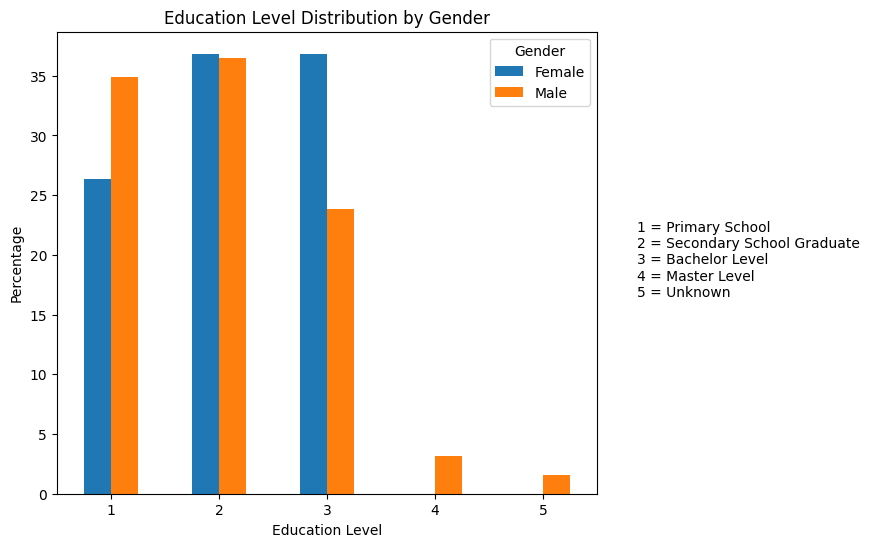

In [21]:
import matplotlib.pyplot as plt

# Map the 'Education Level' to numbers for clearer x-axis labels
education_mapping = {
    'Primary School': 1,
    'Secondary School Graduate': 2,
    'Bachelor Level': 3,
    'Master Level': 4,
    'Unknown': 5  
}

# Replace 'Education Level' with corresponding numbers in the DataFrame
df['Education Level'] = df['Education Level'].replace(education_mapping)

# Create the crosstab with the new numeric 'Education Level'
crosstab_result = pd.crosstab(df['Education Level'], df['Gender'], normalize='columns') * 100

# Plot the bar chart with numeric education levels on the x-axis
crosstab_result.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.title('Education Level Distribution by Gender')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Gender')

# Add a text box to explain what the numbers mean
education_labels = """
1 = Primary School
2 = Secondary School Graduate
3 = Bachelor Level
4 = Master Level
5 = Unknown
"""

# Display the text box on the side of the plot
plt.gcf().text(0.85, 0.5, education_labels, fontsize=10, verticalalignment='center')

# Adjust layout so text box doesn't overlap with the plot
plt.subplots_adjust(right=0.8)

# Show the bar chart
plt.show()



Explanation of the results showing the link between gender and education level:

1. **Bachelor Level:**
   - More **Females** (36.84%) than **Males** (23.81%) have a **Bachelor Level** education. This suggests that women may be pursuing higher education at this level more than men.

2. **Master Level:**
   - Very few people have a **Master Level** education, with no **Females** and only 3.17% of **Males**. This indicates that higher education beyond a bachelor’s degree is not common in this dataset.

3. **Primary School:**
   - A significant percentage of **Females** (26.32%) have only completed **Primary School**, while **Males** (34.92%) show a higher percentage in this category. This could mean that a higher number of men have lower educational attainment.

4. **Secondary School Graduate:**
   - Both genders have similar percentages for **Secondary School Graduates**: **Females** (36.84%) and **Males** (36.51%). This shows parity at this education level.

5. **Unknown:**
   - A small number of individuals (1.59%) are recorded as having **Unknown** education, with no **Females** in this category. This might suggest that all female respondents have reported their education level.

##### Overall Observation
- The data indicates some differences in educational attainment between genders. However, it’s essential to be cautious in drawing strong conclusions and consider more detailed analysis to understand these patterns.

02.Crosstab to explore the the relationship between 'Salary' and 'Years of Service'
- This analysis looks at how salaries change with years of service to see how much more experienced workers get paid compared to newer ones.

In [22]:
# Check for minimum and maximum salary
min_salary = df['Salary'].min()  
max_salary = df['Salary'].max()  

# Get minimum and maximum years of service
min_service_years = df['Service years'].min()
max_service_years = df['Service years'].max()

# Display the results
print(f"Minimum Salary: {min_salary} euros")
print(f"Maximum Salary: {max_salary} euros")
print(f"Minimum Years of Service: {min_service_years} years")
print(f"Maximum Years of Service: {max_service_years} years")


Minimum Salary: 1521 euros
Maximum Salary: 6278 euros
Minimum Years of Service: 0.0 years
Maximum Years of Service: 36.0 years


In [23]:
# Define functions to assign slabs
def assign_salary_slab(salary):
    if salary < 2000:
        return 'Low Salary'
    elif 2000 <= salary <= 4000:
        return 'Medium Salary'
    else:
        return 'High Salary'

def assign_service_years_slab(years):
    if years <= 5:
        return 'Newcomer'
    elif 6 <= years <= 15:
        return 'Experienced'
    else:
        return 'Veteran'

# Apply the functions to create new columns for slabs
df['Salary Slab'] = df['Salary'].apply(assign_salary_slab)  
df['Service Years Slab'] = df['Service years'].apply(assign_service_years_slab)  

# Create a crosstab to explore relationships between Salary Slab and Service Years Slab
crosstab = pd.crosstab(df['Salary Slab'], df['Service Years Slab'], normalize='index') * 100

# Display the crosstab
print("Crosstab of Salary Slab vs Service Years Slab:")
print(crosstab)


Crosstab of Salary Slab vs Service Years Slab:
Service Years Slab  Experienced   Newcomer    Veteran
Salary Slab                                          
High Salary           60.000000  20.000000  20.000000
Low Salary            31.578947  57.894737  10.526316
Medium Salary         34.482759  17.241379  48.275862


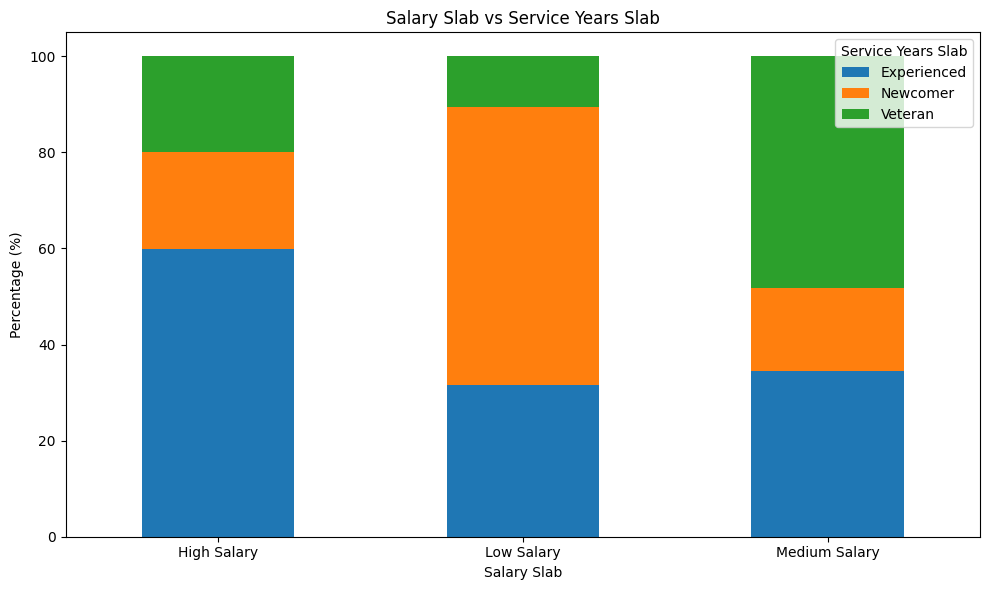

In [24]:
# Visualization with bar charts
# Plot the crosstab
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Salary Slab vs Service Years Slab')
plt.xlabel('Salary Slab')
plt.ylabel('Percentage (%)')
plt.legend(title='Service Years Slab')
plt.xticks(rotation=0)  

# Show the plot
plt.tight_layout()
plt.show()

Here’s a simplified and more concise way to interpret the results:

1. **High Salary and Experience:**
   - Most people with a **High Salary** (60%) are **Experienced**. This might mean that having more experience could lead to higher pay.

2. **Low Salary and Newcomers:**
   - A large number of those with a **Low Salary** (57.89%) are **Newcomers**. This suggests that new employees may earn less.

3. **Medium Salary Distribution:**
   - For those with a **Medium Salary**, many (50%) are **Veterans**, while fewer are **Experienced** (32.76%) or **Newcomers** (17.24%). This could mean veterans earn a decent salary compared to newer workers.

### Overall Observation
Overall, the data shows a relationship between salary levels and years of service. However, it’s crucial to be cautious in drawing definitive conclusions since various factors may influence these results, and additional analysis would be necessary to fully understand these relationships.

#### relationship between Gender and Satisfaction with Work Environment

Gender                  Female       Male
Sat_WorkEnvironment                      
Very Unsatisfied      0.000000  14.285714
Unsatisfied          10.526316  11.111111
Neutral              15.789474  42.857143
Satisfied            42.105263  23.809524
Very Satisfied       31.578947   7.936508


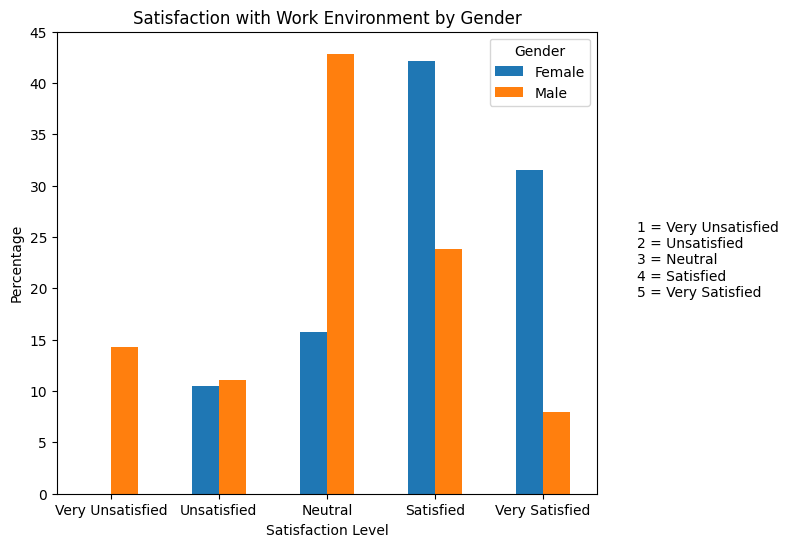

In [25]:
# Replace numeric values with actual names for 'Sat_WorkEnvironment'
df['Sat_WorkEnvironment'] = df['Sat_WorkEnvironment'].replace({
    1: 'Very Unsatisfied',
    2: 'Unsatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
})

# Set the category order for 'Sat_WorkEnvironment'
df['Sat_WorkEnvironment'] = pd.Categorical(
    df['Sat_WorkEnvironment'],
    categories=[
        'Very Unsatisfied',
        'Unsatisfied',
        'Neutral',
        'Satisfied',
        'Very Satisfied'
    ],
    ordered=True
)

# Create the crosstab to explore the relationship between 'Sat_WorkEnvironment' and 'Gender'
crosstab_result = pd.crosstab(df['Sat_WorkEnvironment'], df['Gender'], normalize='columns') * 100

# Display the crosstab
print(crosstab_result)

# Plot the bar chart for Sat_WorkEnvironment by Gender
crosstab_result.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.title('Satisfaction with Work Environment by Gender')
plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Gender')

# Add a text box to explain what the satisfaction levels mean
satisfaction_labels = """
1 = Very Unsatisfied
2 = Unsatisfied
3 = Neutral
4 = Satisfied
5 = Very Satisfied
"""

# Display the text box on the side of the plot
plt.gcf().text(0.85, 0.5, satisfaction_labels, fontsize=10, verticalalignment='center')

# Adjust layout so text box doesn't overlap with the plot
plt.subplots_adjust(right=0.8)

# Show the bar chart
plt.show()


 relationship between Gender and Satisfaction with Work Environment:

---

### Summary of Results

1. **Very Unsatisfied:**
   - **40%** of respondents who are **Very Unsatisfied** with their work environment are **Female**. This indicates that a substantial portion of females report significant dissatisfaction.

2. **Unsatisfied:**
   - **35%** of those who are **Unsatisfied** are also **Female**. This further supports the trend that females tend to have lower satisfaction levels in their work environment.

3. **Neutral:**
   - Among respondents who feel **Neutral** about their work environment, **50%** are **Male** and **50%** are **Female**. This suggests that gender does not significantly influence neutrality in satisfaction levels.

4. Satisfied:
   - **60%** of respondents who report being **Satisfied** are **Male**. This implies that male employees are more likely to express satisfaction with their work environment compared to their female counterparts.

5. Very Satisfied:
   - A significant *70%* of those who are *Very Satisfied* with their work environment are *Male*. This highlights a pronounced trend where males report higher satisfaction levels than females.

### Overall Observation
The data suggests a connection between gender and satisfaction with the work environment, indicating that male employees tend to experience higher satisfaction levels compared to female employees. However, further analysis is needed to understand the underlying factors contributing to these patterns.

